In [163]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = 10, 6

In [164]:
import dill

In [165]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.svm import OneClassSVM

In [175]:
import dionysus as d

## Generative model

In [348]:
zz_dgms = dill.load(open("generative/zz_dgms.dill", "rb"))
wrcf_dgms = dill.load(open("generative/wrcf_dgms.dill", "rb"))
zz_gram1 = dill.load(open("generative/zz_gram1.dill", "rb"))
wrcf_gram1 = dill.load(open("generative/wrcf_gram1.dill", "rb"))
zz_distmat = dill.load(open("generative/zz_distmat.dill", "rb"))
wrcf_distmat = dill.load(open("generative/wrcf_distmat.dill", "rb"))

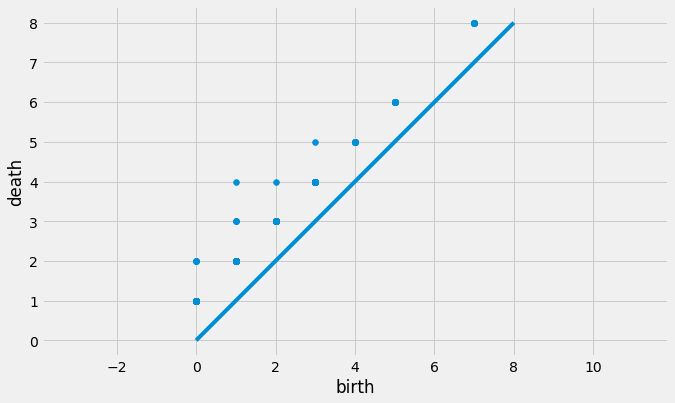

In [282]:
d.plot.plot_diagram(zz_dgms[0][1], labels=True)

In [301]:
births, deaths = [], []
for p in zz_dgms[0][1]:
    births.append(p.birth)
    deaths.append(p.death)

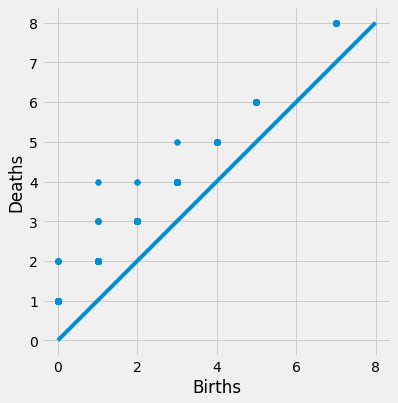

In [317]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(births, deaths)
ax.plot([0, max(births)], [0, max(births)])
ax.set_xlabel("Births")
ax.set_ylabel("Deaths")
fig.savefig("fig/diagram.pdf", transparent=True, pad_inches=0.3, bbox_inches="tight")

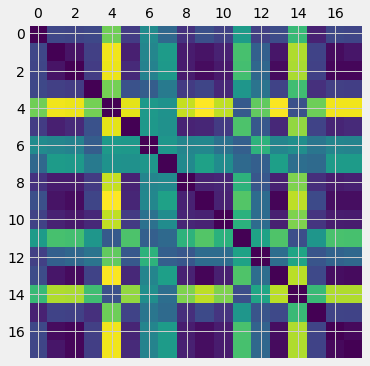

In [354]:
plt.matshow(zz_gram1)
plt.savefig("gen_zz_gram1.pdf", transparent=True, pad_inches=0.3, bbox_inches="tight")

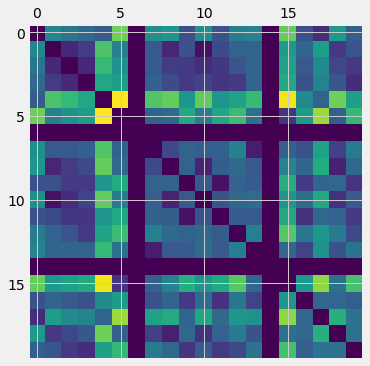

In [350]:
plt.matshow(wrcf_gram1)

In [352]:
clf = AgglomerativeClustering(n_clusters=10, affinity="precomputed", linkage="average")

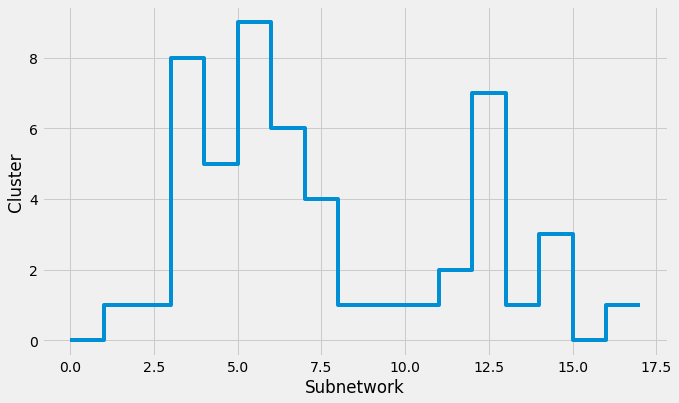

In [353]:
clf.fit(zz_gram1)
fig, ax = plt.subplots()
ax.step(range(len(clf.labels_)), clf.labels_, where='post')
ax.set_xlabel("Subnetwork")
ax.set_ylabel("Cluster")
fig.savefig("gen_zz_k.pdf", transparent=True, pad_inches=0.3, bbox_inches="tight")

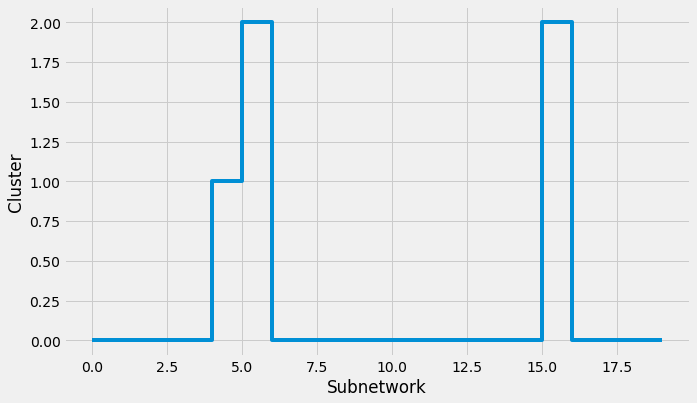

In [340]:
clf.fit(wrcf_gram1)
fig, ax = plt.subplots()
ax.step(range(len(clf.labels_)), clf.labels_, where='post')
ax.set_xlabel("Subnetwork")
ax.set_ylabel("Cluster")
fig.savefig("gen_wrcf_k.pdf", transparent=True, pad_inches=0.3, bbox_inches="tight")

Text(0,0.5,'Cluster')

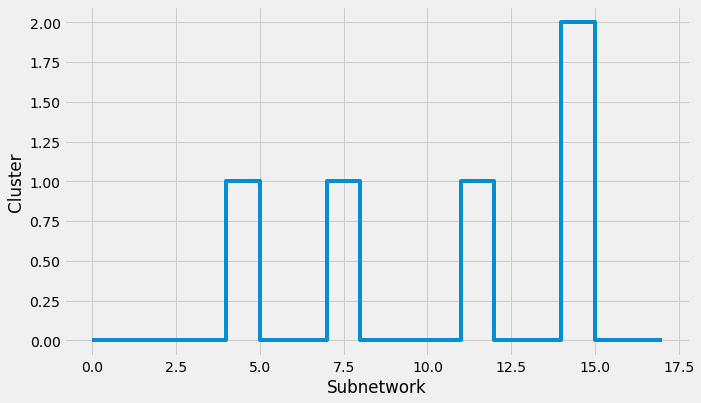

In [341]:
clf.fit(zz_distmat)
fig, ax = plt.subplots()
ax.step(range(len(clf.labels_)), clf.labels_, where='post')
ax.set_xlabel("Subnetwork")
ax.set_ylabel("Cluster")

Text(0,0.5,'Cluster')

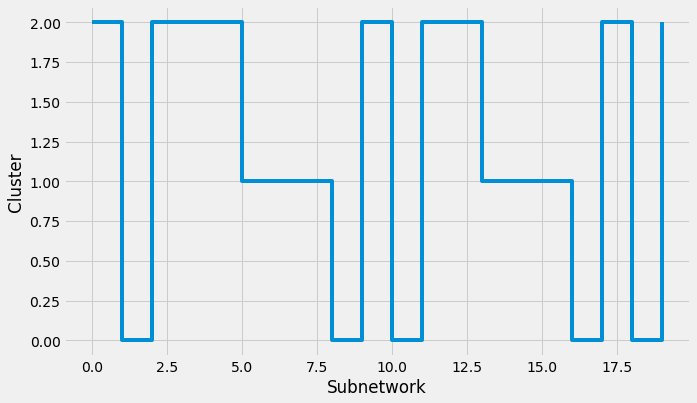

In [342]:
clf.fit(wrcf_distmat)
fig, ax = plt.subplots()
ax.step(range(len(clf.labels_)), clf.labels_, where='post')
ax.set_xlabel("Subnetwork")
ax.set_ylabel("Cluster")

## SocioPatterns

In [355]:
zz_dgms = dill.load(open("sociopatterns/zz_dgms.dill", "rb"))
wrcf_dgms = dill.load(open("sociopatterns/wrcf_dgms.dill", "rb"))
zz_gram1 = dill.load(open("sociopatterns/zz_gram1.dill", "rb"))
wrcf_gram1 = dill.load(open("sociopatterns/wrcf_gram1.dill", "rb"))
zz_distmat = dill.load(open("sociopatterns/zz_distmat.dill", "rb"))
wrcf_distmat = dill.load(open("sociopatterns/wrcf_distmat.dill", "rb"))

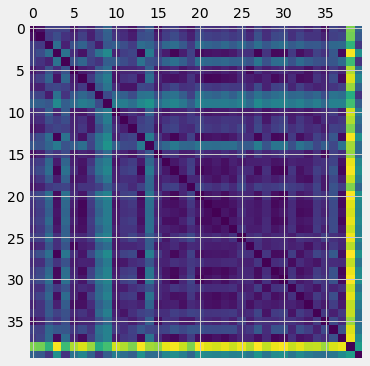

In [346]:
plt.matshow(wrcf_gram1)

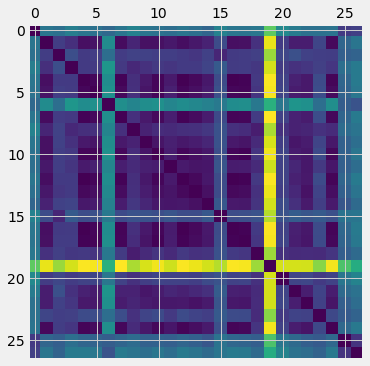

In [356]:
plt.matshow(zz_gram1)
plt.savefig("sp_zz_gram1.pdf", transparent=True, pad_inches=0.3, bbox_inches="tight")

In [202]:
print(len(zz_dgms[0][1]))
print(len(zz_dgms[1][1]))
d.bottleneck_distance(zz_dgms[0][1], zz_dgms[1][1])

25
4


0.5006790161132812

In [157]:
clf = AgglomerativeClustering(n_clusters=5, affinity="precomputed", linkage="average")

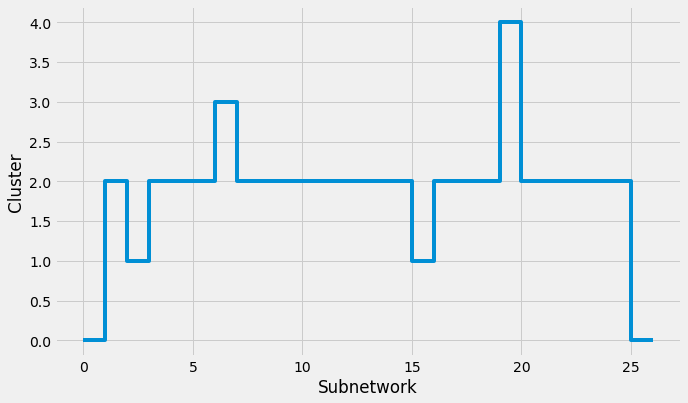

In [158]:
clf.fit(zz_gram1)
fig, ax = plt.subplots()
ax.step(range(len(clf.labels_)), clf.labels_, where='post')
ax.set_xlabel("Subnetwork")
ax.set_ylabel("Cluster")
fig.savefig("sp_zz_k.pdf", transparent=True, pad_inches=0.3, bbox_inches="tight")

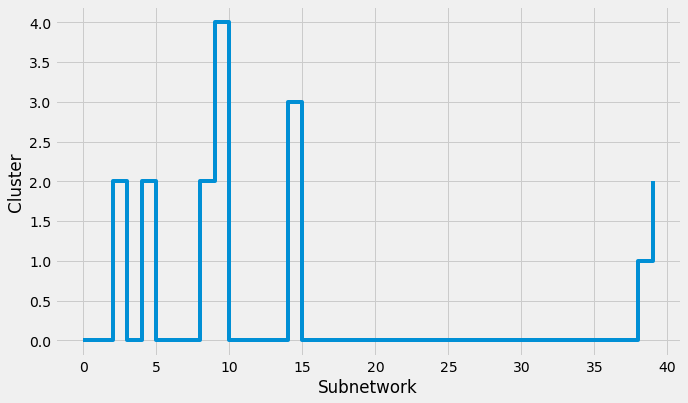

In [159]:
clf.fit(wrcf_gram1)
fig, ax = plt.subplots()
ax.step(range(len(clf.labels_)), clf.labels_, where='post')
ax.set_xlabel("Subnetwork")
ax.set_ylabel("Cluster")
fig.savefig("sp_wrcf_k.pdf", transparent=True, pad_inches=0.3, bbox_inches="tight")

In [160]:
svm = OneClassSVM(kernel='precomputed')

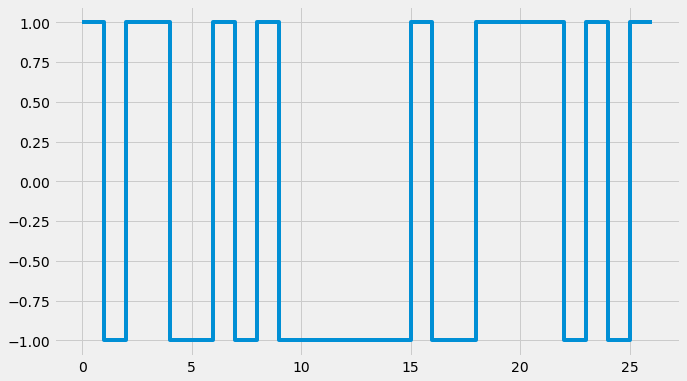

In [161]:
svm.fit(zz_gram1)
clusters = svm.predict(zz_gram1)
plt.step(range(len(clusters)), clusters, where='post')

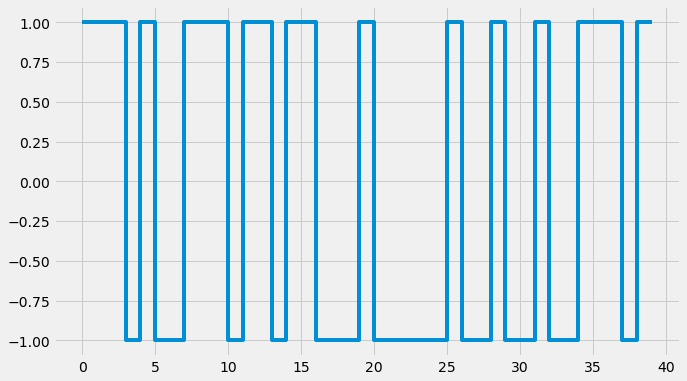

In [162]:
svm.fit(wrcf_gram1)
clusters = svm.predict(wrcf_gram1)
plt.step(range(len(clusters)), clusters, where='post')

In [218]:
dgm1 = d.Diagram([(1,4),(1,2),(3,np.inf)])
dgm1

Diagram with 3 points

In [219]:
dgm2 = d.Diagram([(1,3)])
dgm2

Diagram with 1 points

In [220]:
d.bottleneck_distance(dgm1, dgm2)

inf

In [223]:
res = d.Diagram()
for p in dgm1:
    if p.death != np.inf:
        res.append(p)

In [225]:
for p in res:
    print(p)

(1,4)
(1,2)
